Tarea 1

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#Dimensiones del tablero de ajedrez
ancho, alto = 800, 800
num_cuadros = 8  # Ya que los tableros son 8x8
tam_cuadro = ancho // num_cuadros

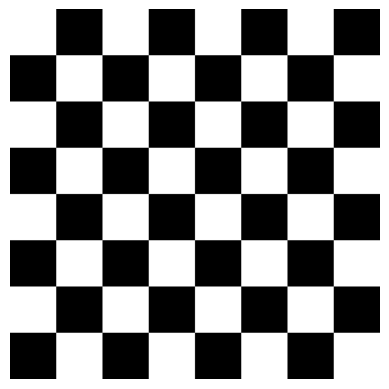

In [53]:
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)
# Creamos la cuadrícula de coordenadas
y, x = np.indices((alto, ancho))

# Patrón de tablero (0 y 1 alternando)
tablero = ((x // tam_cuadro) + (y // tam_cuadro)) % 2

# Pintamos las casillas (blanco y negro)
color_img[tablero == 0] = [255, 255, 255]  # blanco
color_img[tablero == 1] = [0, 0, 0]        # negro



# Mostrar
plt.imshow(color_img)
plt.axis("off")
plt.show()

Tarea 2

In [ ]:
T2 = np.ones((800, 800, 3), dtype=np.uint8) * 255  

# Dibujar rectángulos con los colores deseados
cv2.rectangle(T2, (0, 0), (300, 300), (0, 0, 255), -1)     # Rojo
cv2.rectangle(T2, (0, 300), (300, 400), (0, 255, 0), -1)     # Verde
cv2.rectangle(T2, (400, 0), (800, 200), (255, 255, 0), -1) # Cyan
cv2.rectangle(T2, (300, 200), (800, 400), (0, 255, 255), -1) # Amarillo
cv2.rectangle(T2, (0, 400), (300, 800), (255, 0, 0), -1)   # Azul
cv2.rectangle(T2, (300, 400), (800, 800), (255, 0, 255), -1) # Lila
cv2.rectangle(T2, (300, 0), (400, 200), (145, 38, 65), -1)     # Morado

# Dibujar líneas negras para diferenciar entre rectangulos
cv2.line(T2, (300, 0), (300, 800), (0, 0, 0), 10)
cv2.line(T2, (0, 300), (300, 300), (0, 0, 0), 10)
cv2.line(T2, (0, 400), (800, 400), (0, 0, 0), 10)
cv2.line(T2, (300, 200), (800, 200), (0, 0, 0), 10)
cv2.line(T2, (400, 0), (400, 200), (0, 0, 0), 10)

# Mostrar
cv2.imshow("Mondrian", T2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Tarea 3

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]

        gn = 255 - g # Verde negativo

        # Dimensiones imagen de entrada
        h, w, c = frame.shape

        # Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, gn, b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Tarea 4

In [56]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel, desde la webcam no es BGR
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  
        # Almacena valores del evento
        px = x
        py = y

In [ ]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0 #bandera para primer fotograma
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        # Activa el manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
            
        # Busca el pixel mas claro y oscuro
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(gray)

        # Dibuja círculos en esos píxeles
        cv2.circle(frame, minLoc, 10, (255, 0, 0), 2)   # Azul = más oscuro
        cv2.circle(frame, maxLoc, 10, (0, 0, 255), 2)   # Rojo = más claro


        # Buscar el pixel con rectangulos
        h, w = gray.shape
        block = 8

        # Reducimos la imagen a bloques
        small = cv2.resize(gray, (w // block, h // block), interpolation=cv2.INTER_AREA)
        minValB, maxValB, minLocB, maxLocB = cv2.minMaxLoc(small)

        # Convertimos a coordenadas en la imagen original
        minX, minY = minLocB[0] * block, minLocB[1] * block
        maxX, maxY = maxLocB[0] * block, maxLocB[1] * block

        # Dibujar rectángulos alrededor de bloques
        cv2.rectangle(frame, (minX, minY), (minX + block, minY + block), (255, 0, 0), 2)
        cv2.rectangle(frame, (maxX, maxY), (maxX + block, maxY + block), (0, 0, 255), 2)

        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


Tarea 5

In [ ]:
# Captura de la webcam
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if not ret:
        break

    # Redimensionamos el frame a un tamaño más pequeño para montar el collage
    h, w = frame.shape[:2]
    cam = cv2.resize(frame, (w // 2, h // 2))

    # Primera fila

    img1 = cam.copy()

    img2 = cv2.bitwise_not(cam)

    img3 = cam[:, :, [2, 1, 0]]

    # Segunda fila
    img4 = cv2.applyColorMap(cam, cv2.COLORMAP_CIVIDIS)

    img5 = cv2.applyColorMap(cam, cv2.COLORMAP_JET)

    img6 = cam[:, :, [0, 2, 1]]

    # Tercera fila

    img7 = cv2.applyColorMap(cam, cv2.COLORMAP_PARULA)

    img8 = cv2.applyColorMap(cam, cv2.COLORMAP_INFERNO)

    img9 = cam[:, :, [1, 0, 2]]

    # Montamos el collage 3x3
    top = np.hstack((img1, img2, img3))
    mid = np.hstack((img4, img5, img6))
    bottom = np.hstack((img7, img8, img9))
    collage = np.vstack((top, mid, bottom))

    cv2.imshow("Pop Art", collage)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()
